# Import library

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
#from scipy.stats import zscore
from scipy import stats

In [2]:
#Load dataset
df = pd.read_csv(r'C:\Users\benke\Desktop\DataScience\10Academy\Kefiya_AI_Mastery\Week0\data\data\benin-malanville.csv')
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


# Summary Statistics

In [3]:
#For calculating statistical values
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


# Data Quality Check

In [4]:
#checking for missing values
df.isna().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [5]:
columns = ['GHI', 'DHI', 'DNI']

#rows with negative values
incorrect_values = df[(df['GHI'] < 0) | (df['DNI'] < 0) | (df['DHI'] < 0)]

for col in columns:
    count_incorrect_values = (df[col] < 0).sum()
    print(f"Negative values in {col}: {count_incorrect_values}")

Negative values in GHI: 258847
Negative values in DHI: 259182
Negative values in DNI: 275987


In [6]:
#replacing negative values with 'NaN'
for col in columns:
    df.loc[df[col] < 0, col] = np.nan

#filling those nan values with the mean
for col in columns:
    df[col].fillna(df[col].mean(), inplace = True)

In [7]:
#checking for outliers
col_to_zscore = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

#calculating Z-scores for the specified columns
df_zscore = df[col_to_zscore].apply(stats.zscore)

#rows with outliers Z-score > 3 
outlier_mask = (np.abs(df_zscore) >= 3).any(axis = 1)
df_outliers = df[outlier_mask]
#df[(z_scores > 3).any(axis = 1) | (z_scores < -3).any(axis = 1)]
print("Number of outliers:", len(df_outliers))

Number of outliers: 11902


In [8]:
df[~((df_zscore > 3).any(axis = 1))]

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,476.746489,352.575567,230.808498,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,476.746489,352.575567,230.808498,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,476.746489,352.575567,230.808498,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,476.746489,352.575567,230.808498,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,476.746489,352.575567,230.808498,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,2022-08-08 23:56,476.746489,352.575567,230.808498,0.0,0.0,23.1,98.3,0.3,1.1,0.5,119.3,4.1,996,0,0.0,23.5,22.9,NaN
525596,2022-08-08 23:57,476.746489,352.575567,230.808498,0.0,0.0,23.1,98.3,0.2,0.7,0.4,115.2,2.3,996,0,0.0,23.5,22.9,NaN
525597,2022-08-08 23:58,476.746489,352.575567,230.808498,0.0,0.0,23.1,98.4,0.6,1.1,0.5,129.8,3.4,996,0,0.0,23.5,22.9,NaN
525598,2022-08-08 23:59,476.746489,352.575567,230.808498,0.0,0.0,23.1,98.3,0.9,1.3,0.5,124.4,4.3,996,0,0.0,23.5,22.9,NaN


In [9]:
#Drop rows with any missing values
cols_to_clean = ['Timestamp', 'GHI', 'Tamb']
df_clean_drop = df.dropna(subset = cols_to_clean)
print("Dataframe shape after dropping NaNs:", df_clean_drop)

Dataframe shape after dropping NaNs:                Timestamp         GHI         DNI         DHI  ModA  ModB  \
0       2021-08-09 00:01  476.746489  352.575567  230.808498   0.0   0.0   
1       2021-08-09 00:02  476.746489  352.575567  230.808498   0.0   0.0   
2       2021-08-09 00:03  476.746489  352.575567  230.808498   0.0   0.0   
3       2021-08-09 00:04  476.746489  352.575567  230.808498   0.0   0.0   
4       2021-08-09 00:05  476.746489  352.575567  230.808498   0.0   0.0   
...                  ...         ...         ...         ...   ...   ...   
525595  2022-08-08 23:56  476.746489  352.575567  230.808498   0.0   0.0   
525596  2022-08-08 23:57  476.746489  352.575567  230.808498   0.0   0.0   
525597  2022-08-08 23:58  476.746489  352.575567  230.808498   0.0   0.0   
525598  2022-08-08 23:59  476.746489  352.575567  230.808498   0.0   0.0   
525599  2022-08-09 00:00  476.746489  352.575567  230.808498   0.0   0.0   

        Tamb    RH   WS  WSgust  WSstdev     WD  W

In [10]:
#Drop rows with any missing values
cols_to_clean = ['Timestamp', 'GHI', 'Tamb']
df_clean_drop = df.dropna(subset = cols_to_clean)
print("Dataframe shape after dropping NaNs:", df_clean_drop)

Dataframe shape after dropping NaNs:                Timestamp         GHI         DNI         DHI  ModA  ModB  \
0       2021-08-09 00:01  476.746489  352.575567  230.808498   0.0   0.0   
1       2021-08-09 00:02  476.746489  352.575567  230.808498   0.0   0.0   
2       2021-08-09 00:03  476.746489  352.575567  230.808498   0.0   0.0   
3       2021-08-09 00:04  476.746489  352.575567  230.808498   0.0   0.0   
4       2021-08-09 00:05  476.746489  352.575567  230.808498   0.0   0.0   
...                  ...         ...         ...         ...   ...   ...   
525595  2022-08-08 23:56  476.746489  352.575567  230.808498   0.0   0.0   
525596  2022-08-08 23:57  476.746489  352.575567  230.808498   0.0   0.0   
525597  2022-08-08 23:58  476.746489  352.575567  230.808498   0.0   0.0   
525598  2022-08-08 23:59  476.746489  352.575567  230.808498   0.0   0.0   
525599  2022-08-09 00:00  476.746489  352.575567  230.808498   0.0   0.0   

        Tamb    RH   WS  WSgust  WSstdev     WD  W

In [11]:
#Imputing missing values with the median
cols_to_impute = ['GHI', 'DNI', 'DHI']
for cols in cols_to_impute:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace = True)
print(df.isna().sum())

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [12]:
#Export cleaned Dataframe
country = 'benin'
output_path = f'C:/Users/benke/Desktop/solar-challenge-week1/data/{country}_clean.csv'
df.to_csv(output_path, index = False)
print(f"Cleaned data exported to : ", {output_path})

Cleaned data exported to :  {'C:/Users/benke/Desktop/solar-challenge-week1/data/benin_clean.csv'}


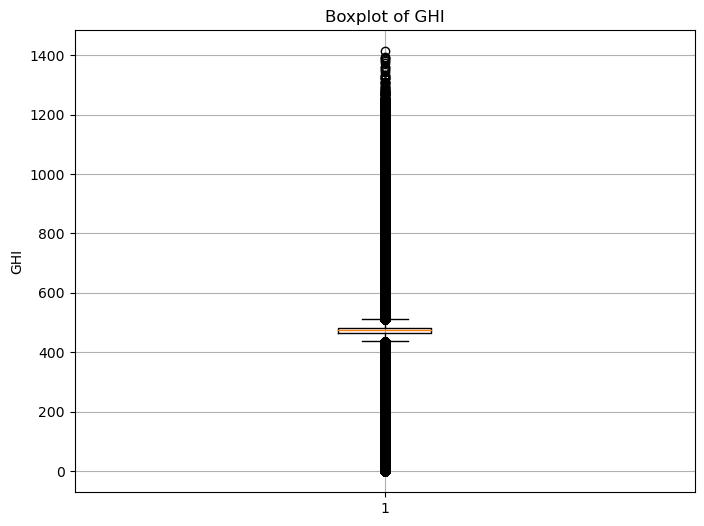

In [13]:
#Variables that are cleaned of outliners
plt.figure(figsize = (8,6))
plt.boxplot(df['GHI'])
plt.title('Boxplot of GHI')
plt.ylabel('GHI')
plt.grid(True)
plt.show()

# Time Series Analysis

In [14]:
#convert Timestamp to datetime
df.loc[:, 'Timestamp'] = pd.to_datetime(df['Timestamp'])

#convert to datetime and handle invalid dates
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors = 'coerce')

#Extract day, month and year
df.loc[:, 'Date'] = df['Timestamp'].dt.date
df.loc[:, 'Month'] = df['Timestamp'].dt.month
df.loc[:, 'Year'] = df['Timestamp'].dt.year

In [15]:
#Aggregate Data

#Daily mean
daily = df.groupby('Date')[['GHI', 'DNI', 'DHI', 'Tamb']].mean().reset_index()

#Monthly mean
monthly = df.groupby('Month')[['GHI', 'DNI', 'DHI', 'Tamb']].mean().reset_index()

#Yearly mean
yearly = df.groupby('Year')[['GHI', 'DNI', 'DHI', 'Tamb']].mean().reset_index()

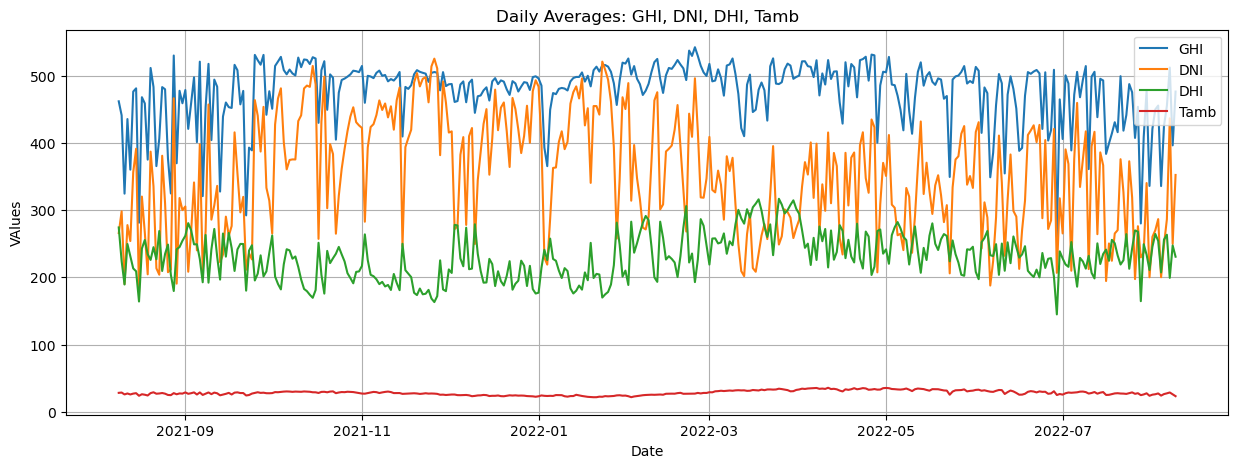

In [16]:
#Daily status
plt.figure(figsize = (15,5))
for col in ['GHI', 'DNI', 'DHI', 'Tamb']:
    plt.plot(daily['Date'], daily[col], label = col)

plt.title('Daily Averages: GHI, DNI, DHI, Tamb')
plt.xlabel('Date')
plt.ylabel('VAlues')
plt.legend() #loc = 'upper right'
plt.grid(True)
plt.show()

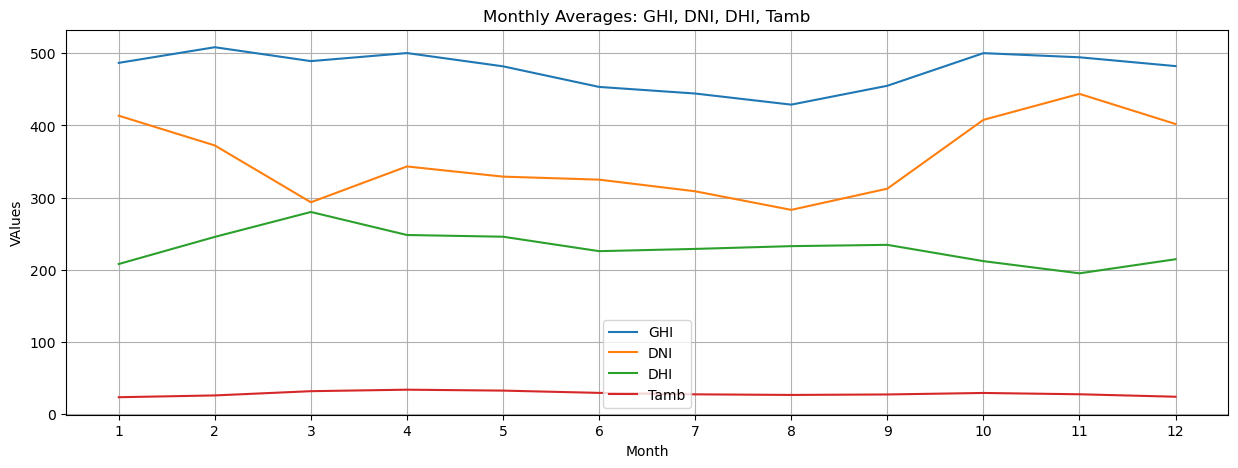

In [17]:
#Show monthly status
plt.figure(figsize = (15,5))
for col in ['GHI', 'DNI', 'DHI', 'Tamb']:
    plt.plot(monthly['Month'].astype(str), monthly[col], label=col)
    
#plt.figure(figsize = (15,5))
plt.title('Monthly Averages: GHI, DNI, DHI, Tamb')
plt.xlabel('Month')
plt.ylabel('VAlues')
plt.legend() #loc = 'upper right'
plt.grid(True)
plt.show()

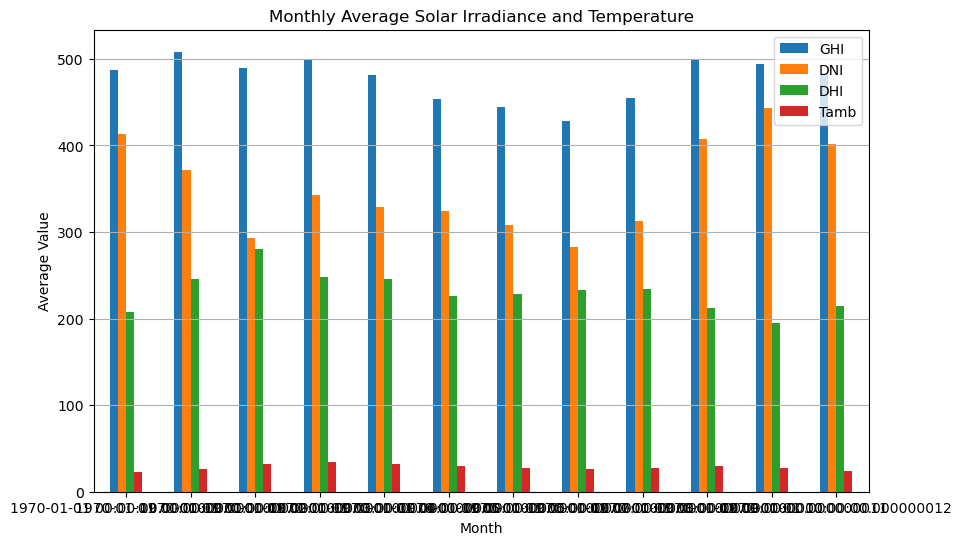

In [19]:
time_cols = ['GHI', 'DNI', 'DHI', 'Tamb']
df['Month'] = pd.to_datetime(df['Timestamp'].dt.month)
monthly_avg = df.groupby('Month')[time_cols].mean()
monthly_avg.plot(kind='bar', figsize = (10, 6))
plt.title('Monthly Average Solar Irradiance and Temperature')
plt.xlabel('Month')
plt.ylabel('Average Value')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

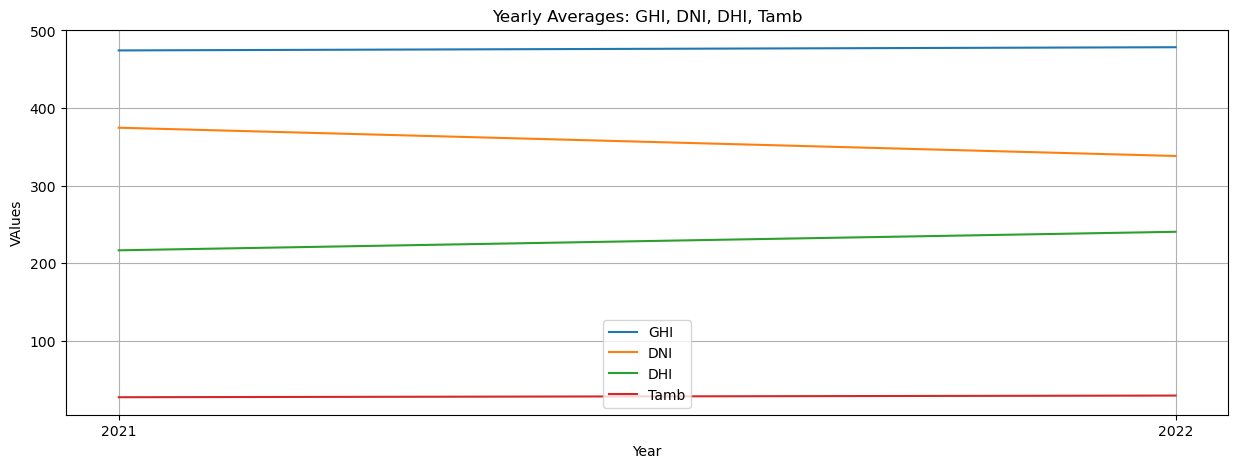

In [20]:
#Yearly status
plt.figure(figsize = (15,5))
for col in ['GHI', 'DNI', 'DHI', 'Tamb']:
    plt.plot(yearly['Year'].astype(str), yearly[col], label=col)
    
#plt.figure(figsize = (15,5))
plt.title('Yearly Averages: GHI, DNI, DHI, Tamb')
plt.xlabel('Year')
plt.ylabel('VAlues')
plt.legend() #loc = 'upper right'
plt.grid(True)
plt.show()

# Correlation Analysis

<Axes: >

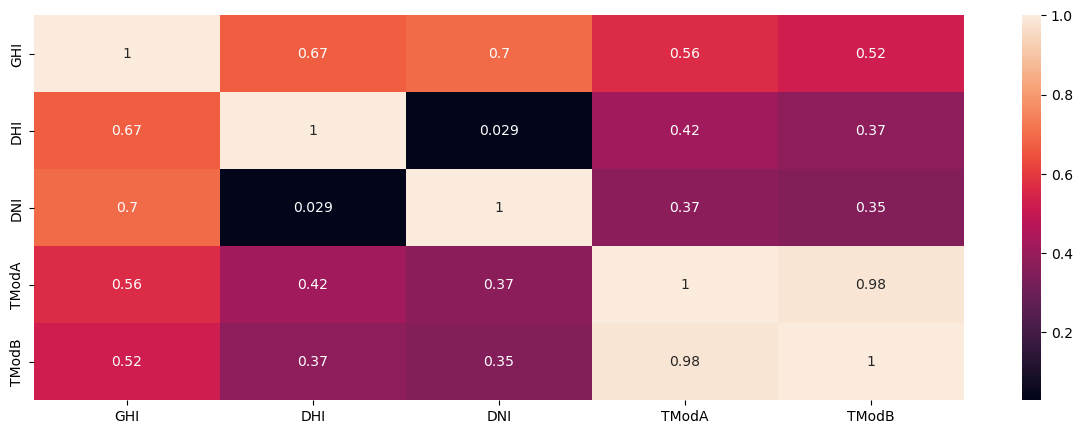

In [21]:
corr = df[['GHI', 'DHI', 'DNI', 'TModA', 'TModB']].corr()
plt.figure(figsize =(15, 5))
sns.heatmap(corr, annot=True)

# Wind Analysis

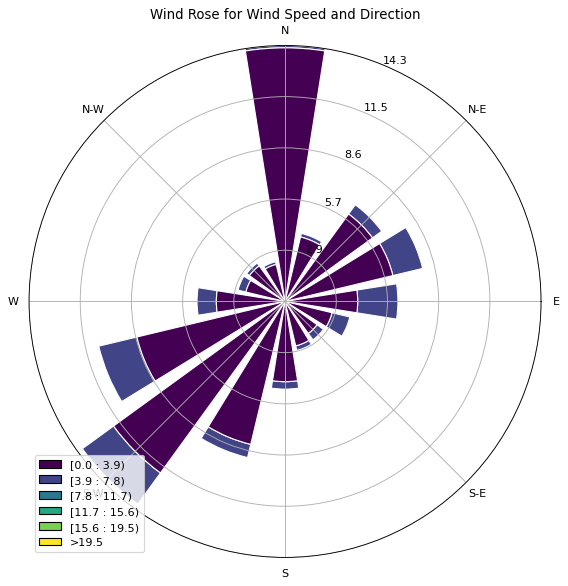

In [22]:
#Radial barplot for wind direction
from windrose import WindroseAxes
ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed = True, opening = 0.8, edgecolor = 'white')
plt.title('Wind Rose for Wind Speed and Direction')
plt.legend()
plt.show()


# Temprature Analysis

C:\Users\benke\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


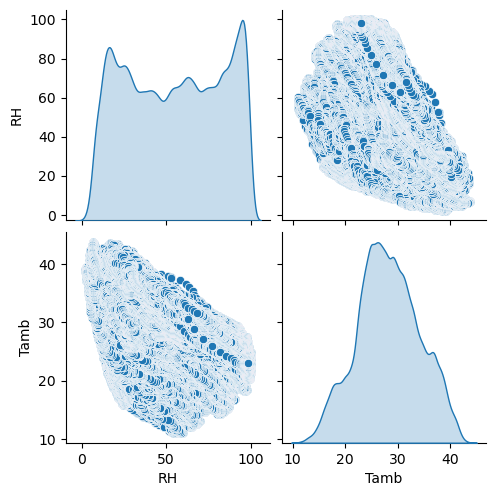

In [23]:
sns.pairplot(df, vars = ['RH', 'Tamb'], diag_kind = 'kde')
plt.show()

# Histograms

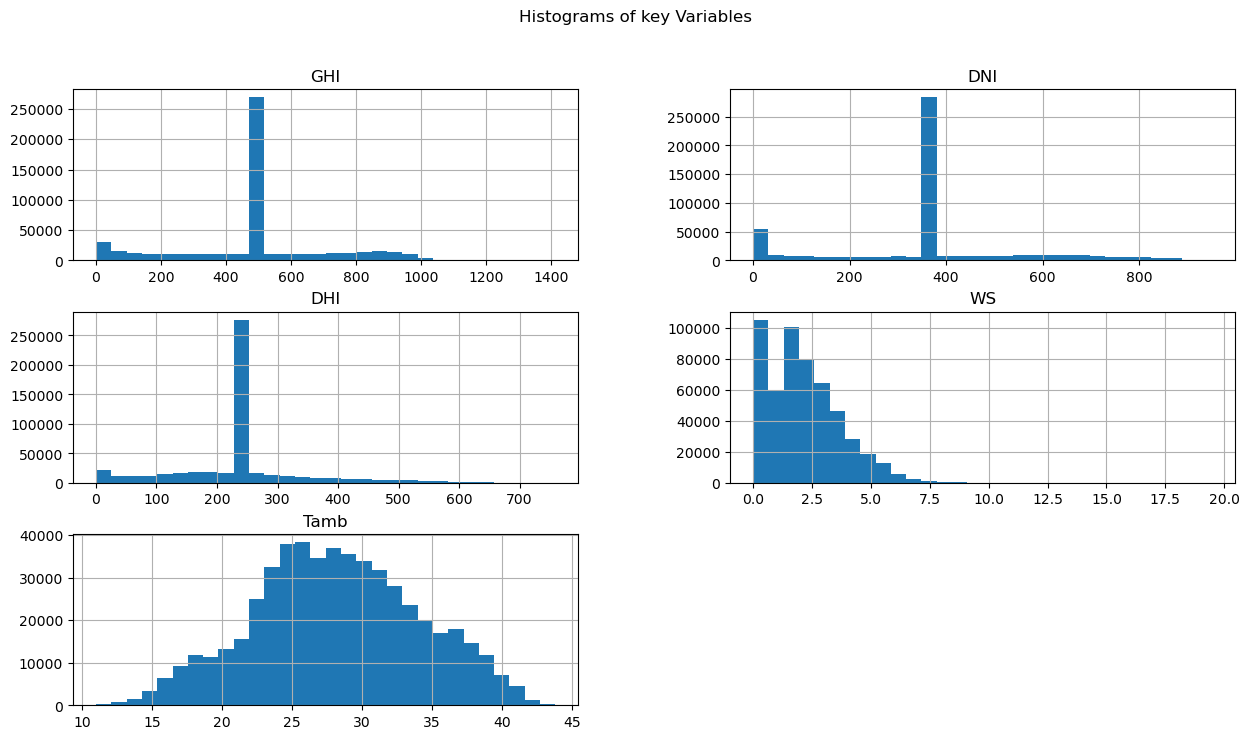

In [24]:
#Plot Histogram for key variables
variables = ['GHI', 'DNI', 'DHI', 'WS', 'Tamb']
df[variables].hist(bins = 30, figsize = (15,8))
plt.suptitle('Histograms of key Variables')
plt.show()

In [25]:
#Convert Timestamp to datetime
df.loc[:, 'Timestamp'] = pd.to_datetime(df['Timestamp'].astype(str))

#convert to datetime and handle invalid dates
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors = 'coerce')

#Extract day, month and year
df.loc[:, 'Date'] = df['Timestamp'].dt.date
df.loc[:, 'Month'] = df['Timestamp'].dt.month
df.loc[:, 'Year'] = df['Timestamp'].dt.year

# Bubble Charts

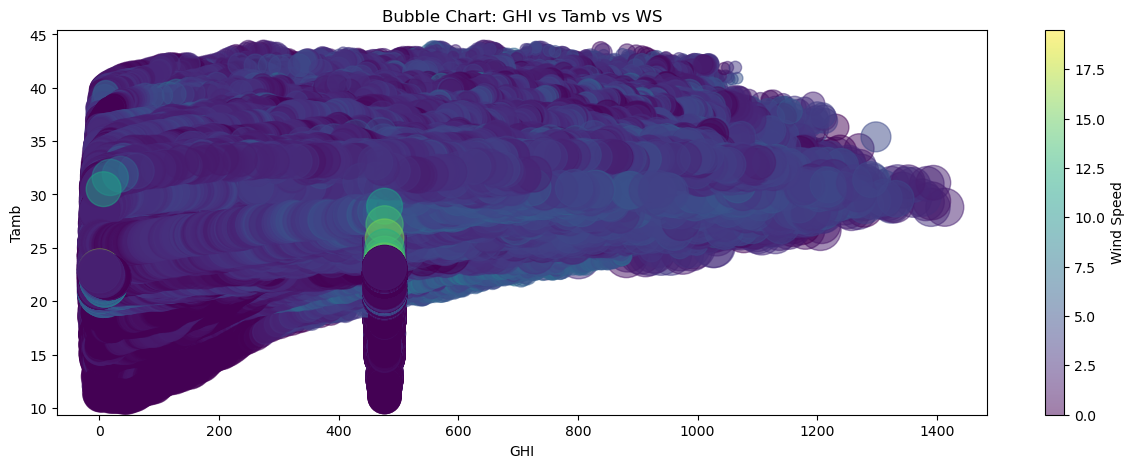

In [26]:
#Bubble chart or GHI vs Tamb vs WS
plt.figure(figsize = (15,5))
bubble_chart = plt.scatter(df['GHI'], df['Tamb'], s = df['RH']*10, c = df['WS'], alpha = 0.5, cmap = 'viridis')

plt.colorbar(bubble_chart, label = 'Wind Speed')
plt.title("Bubble Chart: GHI vs Tamb vs WS")
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.show();